# TPF

In [1]:
#import sys
#sys.path.append('/Users/catalina/Dropbox/Research/TESS-Bn/')
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rc('xtick', direction='in', top='on')
#plt.rc('xtick.minor', visible=True)
plt.rc('ytick', direction='in', right='on')

from scipy.signal import find_peaks
from astroquery.simbad import Simbad

# Astro-packages
import astropy.units as u
from astropy.coordinates import SkyCoord
import pandas as pd

# Gaia
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source" # Select Data Release 3
Gaia.ROW_LIMIT = -1 # Set the number of output raw limit to infinite

# Lightkurve
import lightkurve as lk

# from LCExtrac import working_dir, query_lc, change_aperture, contaminants, tpf_to_lc, detrended_tpf_to_lc, sig_clip_lc, get_mag_lc, export_lc, lc_to_perid, export_pg, query_for_spectral_type
from LCExtrac import *
import warnings
import re
warnings.filterwarnings('ignore')

maindir = working_dir()
print(maindir)

/home/jassir/Projects/LightkurveDenoise


In [2]:
# Create DATA directory.
# Function (query_lc) not working correctly while creating DATA directory and subdirectories
# Check function query_lc
try:
    os.mkdir('./DATA')
except:
    pass

target_name = 'TIC441752709'

#less exposure time #Target Pixel File (tpf)
TARGET=query_lc(target_name, author="TESS-SPOC", cadence=1800, method='tpf')

SearchResult containing 2 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 09 2019 TESS-SPOC    1800   441752709      0.0
  1 TESS Sector 10 2019 TESS-SPOC    1800   441752709      0.0
Directory tree created in /home/jassir/Projects/LightkurveDenoise/DATA/TIC441752709 


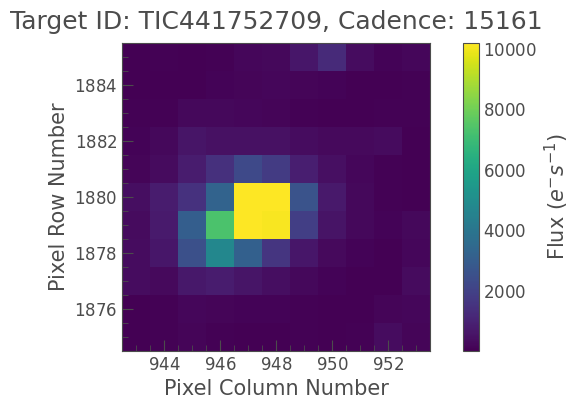

In [3]:
TARGET.plot()
plt.show()

Showing current mask...


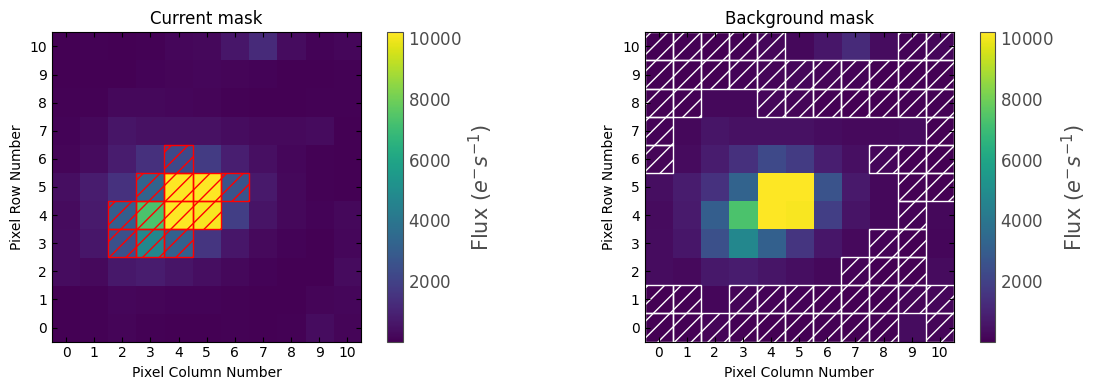

TessTargetPixelFile(TICID: TIC441752709)

In [4]:
change_aperture(TARGET) # less threshold --> more area

INFO: Query finished. [astroquery.utils.tap.core]


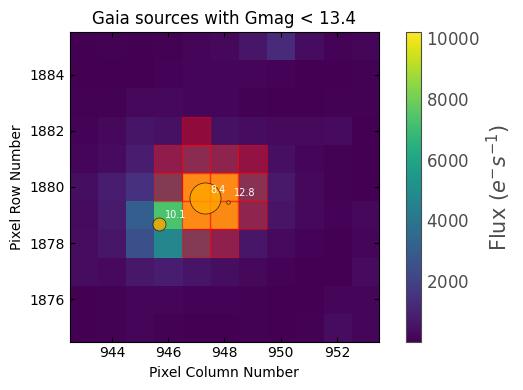

In [5]:
contaminants(TARGET, mask='pipeline', dmag=5, dist_cont=100) #pipeline or new

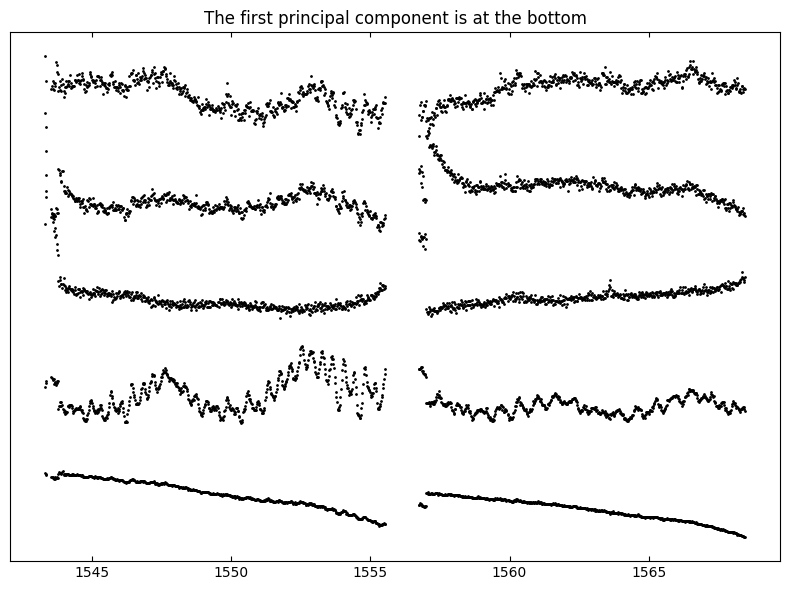

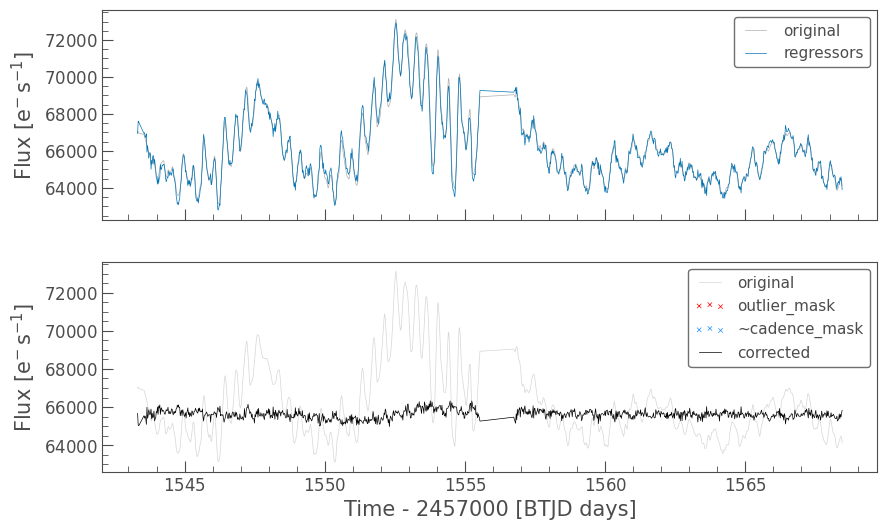

In [6]:
TARGET_2 = tpf_to_lc(TARGET, mask='pipeline') #LC uncorrected from aperture chosen before
TARGET_3 = detrended_tpf_to_lc(TARGET_2, TARGET, TARGET.mask_background, npcs=5)
#removing instrument noise and systematics 
#TESS Full Frame Images (FFIs) have an additive scattered light background 
#that has not been removed by the pipeline. This scattered light must be removed 
#by the user. This can be done in a few ways, including a basic median subtraction. 

In [7]:
LC=TARGET_3.plot()
plt.savefig(maindir+'/DATA/'+TARGET_2.targetid+'/lightcurve/LC.png')
export_lc(TARGET_3, output_path='default', append='')

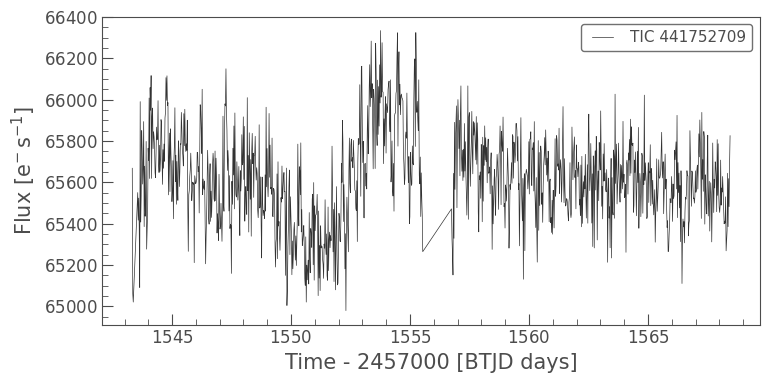

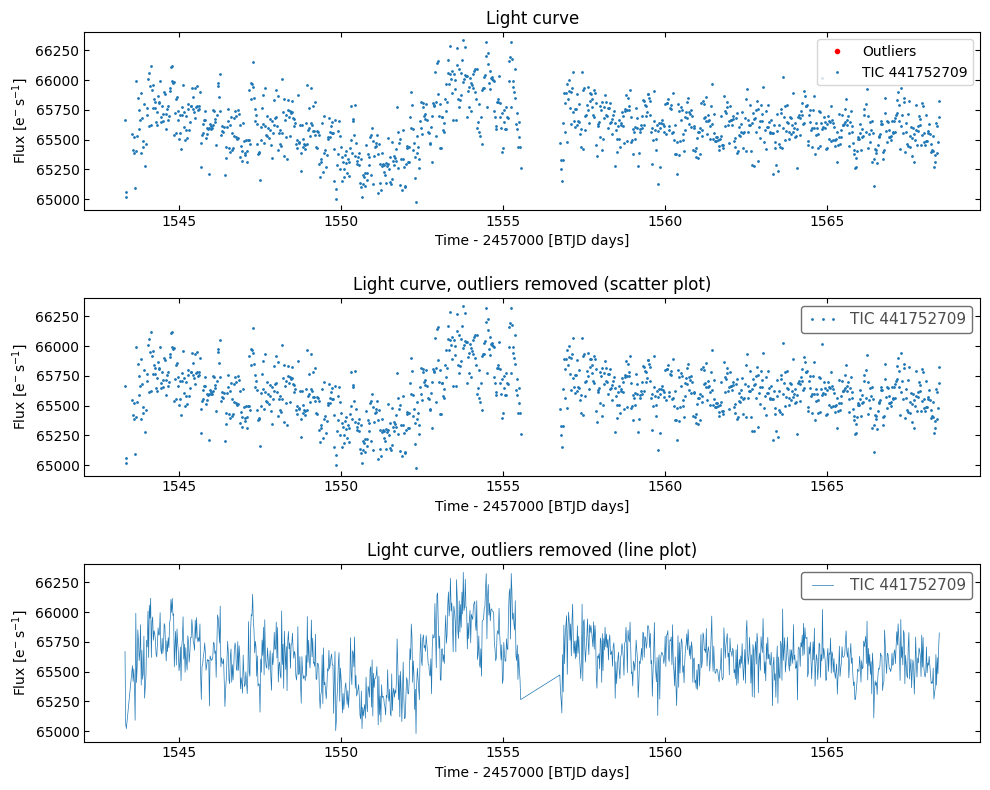

In [8]:
TARGET_4=sig_clip_lc(TARGET_3, sigma=5)